# HOUSE PRICE PREDICTION

In [1]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#dataset
df = pd.read_csv("./Data/data.csv")

In [4]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0,490000.0,335000.0,482000.0,452500.0,640000.0
bedrooms,3.0,5.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5,1.0,2.0,2.5,2.5,2.0
sqft_living,1340,3650,1930,2000,1940,880,1350,2710,2430,1520
sqft_lot,7912,9050,11947,8030,10500,6380,2560,35868,88426,6200
floors,1.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.5
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,4,0,0,0,0,0,0,0,0
condition,3,5,4,4,4,3,3,3,4,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [9]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [10]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
date,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00,2014-05-02 00:00:00
price,313000.0,2384000.0,342000.0,420000.0,550000.0,490000.0,335000.0,482000.0,452500.0,640000.0
bedrooms,3.0,5.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0
bathrooms,1.5,2.5,2.0,2.25,2.5,1.0,2.0,2.5,2.5,2.0
sqft_living,1340,3650,1930,2000,1940,880,1350,2710,2430,1520
sqft_lot,7912,9050,11947,8030,10500,6380,2560,35868,88426,6200
floors,1.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.5
waterfront,0,0,0,0,0,0,0,0,0,0
view,0,4,0,0,0,0,0,0,0,0
condition,3,5,4,4,4,3,3,3,4,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  year    

<AxesSubplot:xlabel='year,month'>

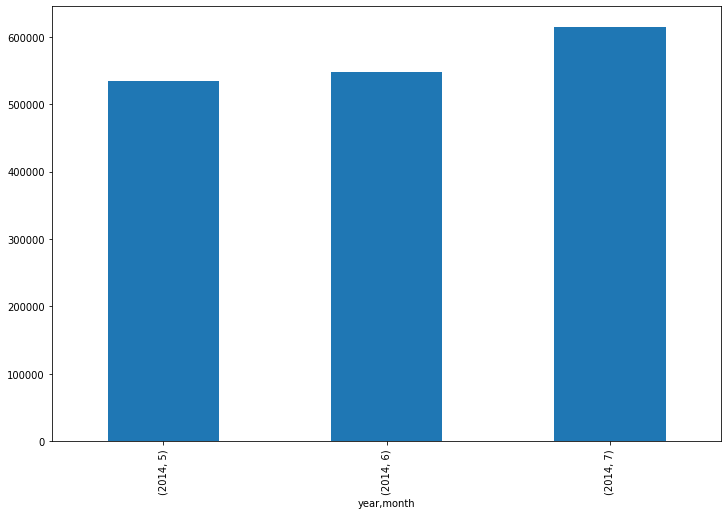

In [12]:
df.groupby(['year','month'])['price'].mean().plot(kind = 'bar', figsize=(12,8))

<AxesSubplot:xlabel='month'>

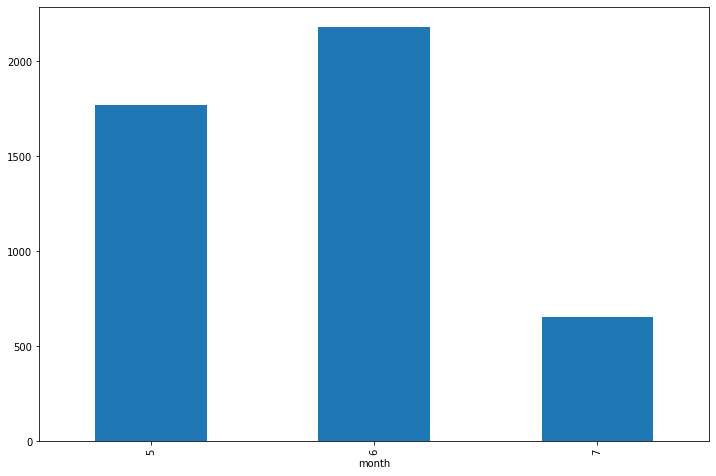

In [13]:
df.groupby(['month'])['price'].count().plot(kind = 'bar', figsize=(12,8))

In [14]:
df = df.drop(['date'], axis=1)
df = df.drop(['year'], axis=1)

In [15]:
tabcorr = df.corr()

In [16]:
tabcorr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.041081
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,0.010835
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886,0.026697
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.032825
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.023286
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996,0.036890
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.007530
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,-0.011304
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,0.017695
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,0.042919


<AxesSubplot:>

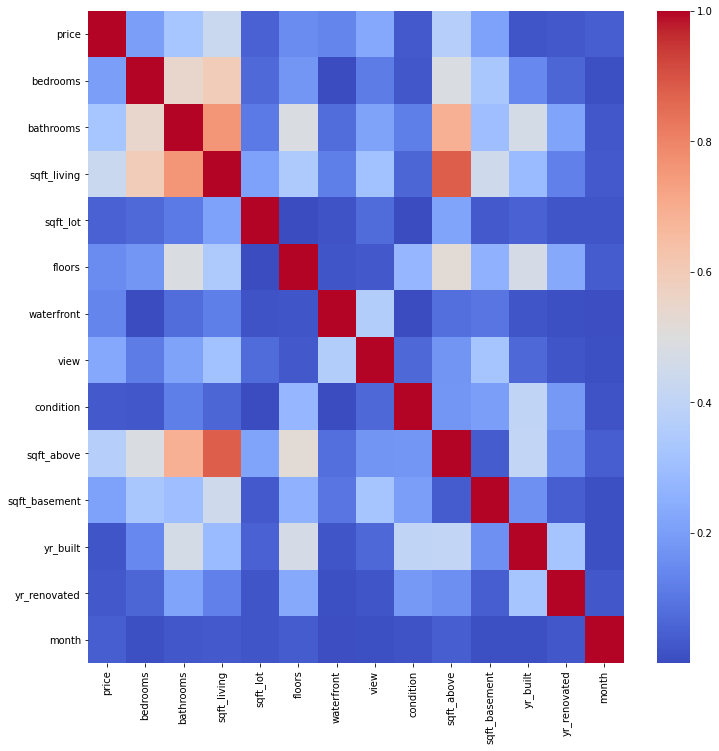

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

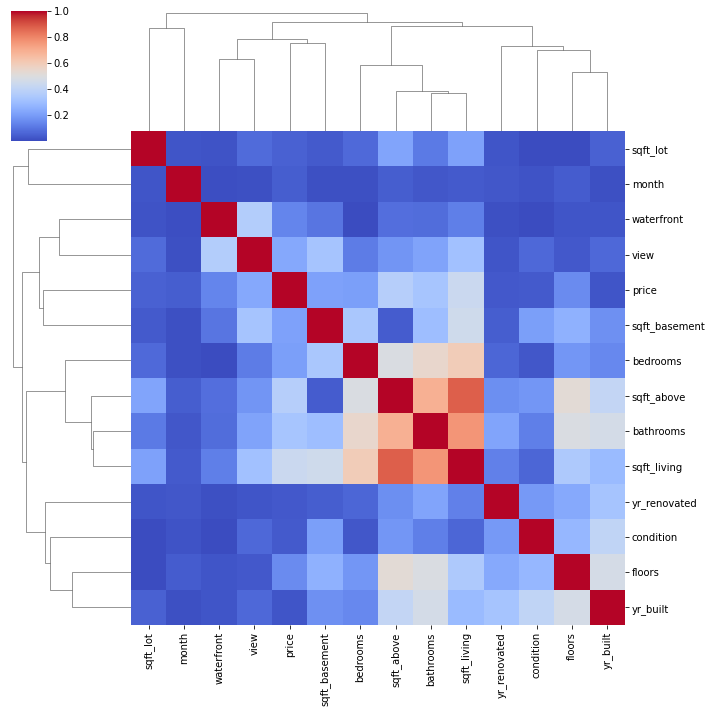

In [18]:
sns.clustermap(abs(tabcorr), cmap="coolwarm")

In [19]:
correlations = tabcorr.price
print(correlations)

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
month            0.041081
Name: price, dtype: float64


In [20]:
correlations = correlations.drop(['price'],axis=0)
print(abs(correlations).sort_values(ascending=False))

sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
month            0.041081
condition        0.034915
yr_renovated     0.028774
yr_built         0.021857
Name: price, dtype: float64


In [21]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'month'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  month          4600 non-null   int64  
dtypes: float

In [23]:
continuous_features = ['sqft_living','sqrt_log','sqft_above','sqft_basement','sqft_lot']
discrete_features = ['month','city','bedrooms','bathrooms','floors','waterfront','view','condition',
                     'country','yr_built','yr_renovated','statezip','street']

In [24]:
df1 = df[df.price<1000000].drop(discrete_features, axis=1)

In [27]:
X = df1.drop(['price'], axis=1)
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4256 entries, 0 to 4599
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4256 non-null   float64
 1   sqft_living    4256 non-null   int64  
 2   sqft_lot       4256 non-null   int64  
 3   sqft_above     4256 non-null   int64  
 4   sqft_basement  4256 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 199.5 KB


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)            # apprentissage
y_pred = lm.predict(X_test) 

Text(0.5, 1.0, 'Prix reels vs predictions')

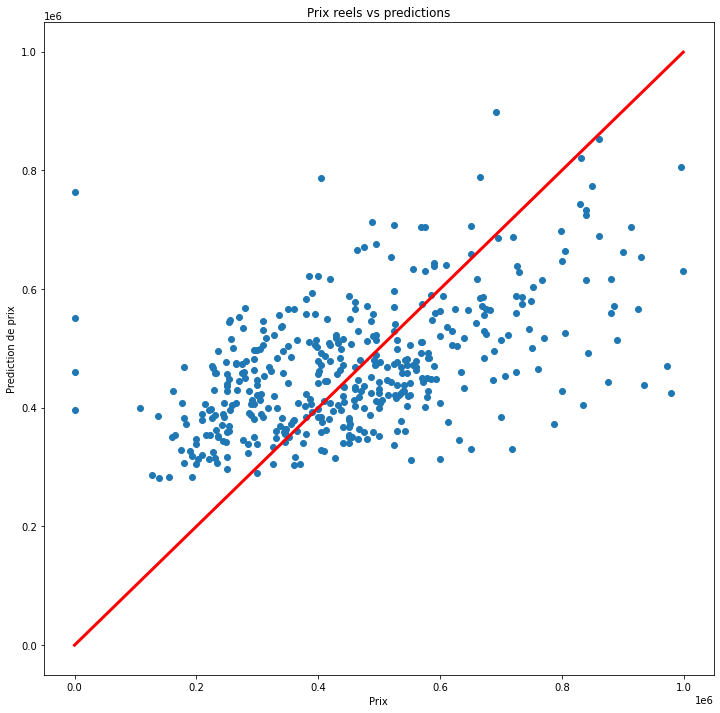

In [31]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

c:\users\srinivas\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

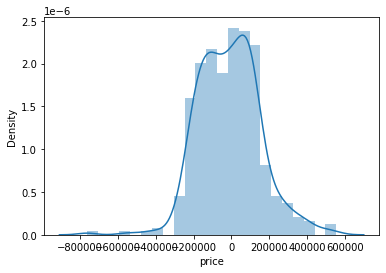

In [32]:
sns.distplot(y_test-y_pred)

In [33]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

163032.1558829948


In [34]:
scoreR2 = r2_score(y_test, y_pred)
print(scoreR2)

0.2678889168912386


In [35]:
lm.score(X_test,y_test)

0.2678889168912386

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
 17  month          4600 non-null   int64  
dtypes: float

In [37]:
df = df.drop(['city'], axis=1)
df = df.drop(['statezip'], axis=1)
df = df.drop(['country'], axis=1)
df = df.drop(['street'], axis=1)

X = df.drop(['price'], axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [38]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(rf.score(X_test,y_test))

0.2814788278009802


Text(0.5, 1.0, 'Prix reels vs predictions')

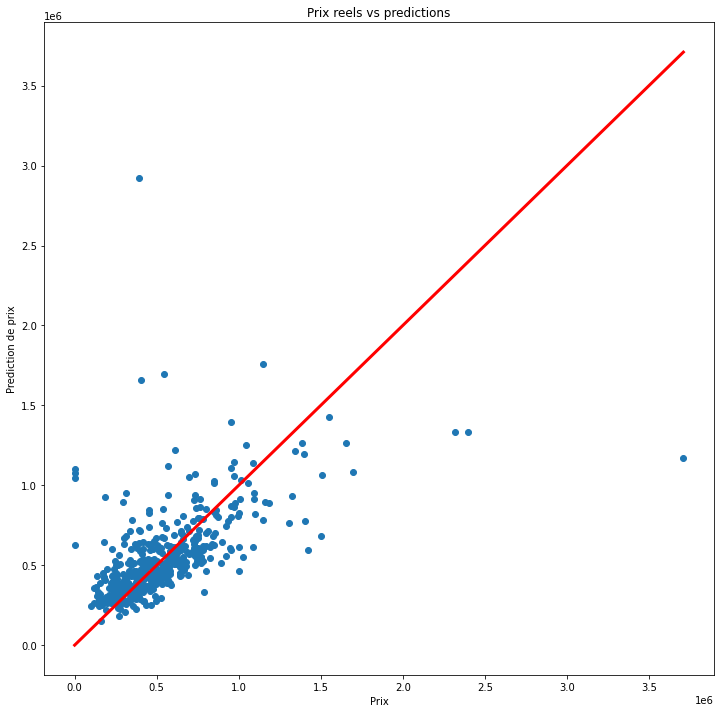

In [39]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")

c:\users\srinivas\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

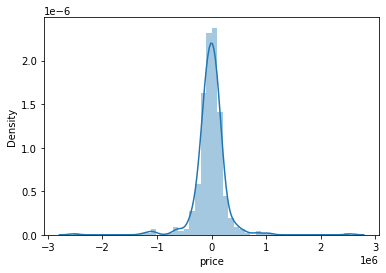

In [40]:
sns.distplot(y_test-y_rf)

In [41]:
print(np.sqrt(mean_squared_error(y_test, y_rf)))

286527.13936695934


In [42]:
rf.score(X_test,y_test)

0.2814788278009802

-0.46582497269139633


Text(0.5, 1.0, 'Prix reels vs predictions')

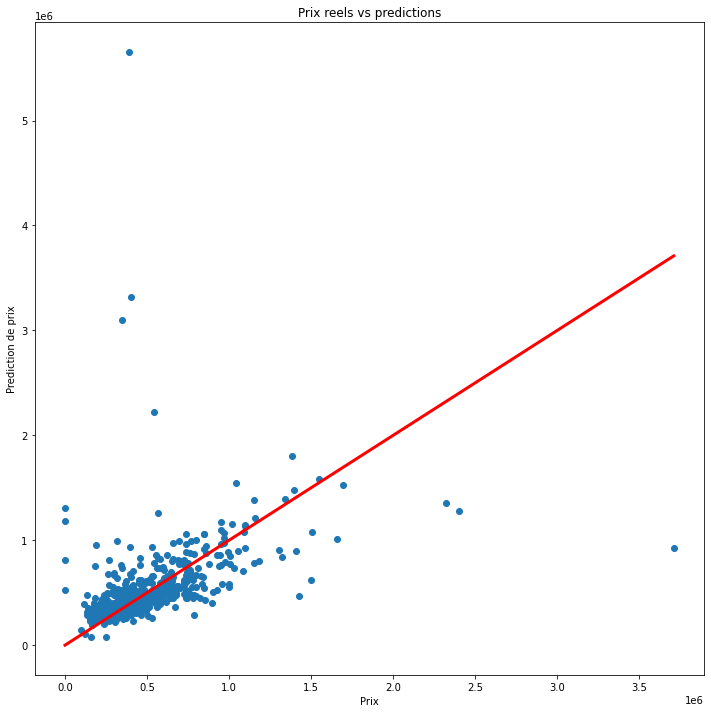

In [43]:
import xgboost as XGB
xgb  = XGB.XGBRegressor()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
print(xgb.score(X_test,y_test))

plt.figure(figsize=(12,12))
plt.scatter(y_test, y_xgb)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction de prix")
plt.title("Prix reels vs predictions")